<h1>Create NumPy arrays using Python's "array like" data types</h1>


In [417]:
import numpy as np  # np.set_printoptions(precision=2)
print(np.__version__)

1.16.4


In [418]:
my_list = [-17, 0, 4, 5, 29]
np_array=np.array(my_list)
print(np_array) 

[-17   0   4   5  29]


## multiply * works differently between python types and np typy

In [419]:
my_list_10x=my_list*10
print(my_list_10x)
np_array_10x=np_array*10
print(np_array_10x)

[-17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29, -17, 0, 4, 5, 29]
[-170    0   40   50  290]


##complex and tuple

In [420]:
tupleToNumpy=(14, -3.14, 4+3j); tupleToNumpy2=(-14, 3.21)  #int, float, complex, np array keeps elements of array uniform
numpyFromTuple=np.array(tupleToNumpy)
numpyFromTuple2=np.array(tupleToNumpy2)
print(numpyFromTuple)
print(numpyFromTuple2)


[14.  +0.j -3.14+0.j  4.  +3.j]
[-14.     3.21]


## shallow and deep copy

In [421]:
nplist1=np.arange(10)
nplist2=nplist1   #shallow copy alternatively nplist2 = nplist1.view()
print(nplist1 is nplist2) # true, point to the same memory
print(id(nplist1)) #memory location
print(id(nplist2)) #memory location

nplist1[1]=8;
print(nplist2)

True
139861733759456
139861733759456
[0 8 2 3 4 5 6 7 8 9]


In [422]:
nplist2.shape=(5,2)
print("nplist1 =", nplist1)
print("nplist2 =", nplist2)
print(nplist1 is nplist2)

('nplist1 =', array([[0, 8],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]]))
('nplist2 =', array([[0, 8],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]]))
True


In [423]:
nplist3 = nplist2.copy() #deep copy
nplist3 is nplist2

False

When using Ravel and Flatten to change dimensions, different dimension of nparray can still be a shadow copy. 

##simple methods

In [424]:
# numpy.arange([start, ]stop, [step, ]dtype=None) official url by google np.arange
np.arange(10,30,2)*10-3

array([ 97, 117, 137, 157, 177, 197, 217, 237, 257, 277])

In [425]:
np.arange(20,step=4)

array([ 0,  4,  8, 12, 16])

In [426]:
nparray=(np.arange(10,30,2)-3)*10
nparray

array([ 70,  90, 110, 130, 150, 170, 190, 210, 230, 250])

In [427]:
nparray.size # this only gives number of elements

10

In [428]:
np.linspace(0,30,10,True)

array([ 0.    ,  3.3333,  6.6667, 10.    , 13.3333, 16.6667, 20.    ,
       23.3333, 26.6667, 30.    ])

##indexing, shaping (dimension), slicing, adding, removing and other multiplating

In [429]:
# Create a 2d array with ones on the border and zeros inside the border
my_bordered_array = np.ones((5,5))
my_bordered_array[1:-1,1:-1] = 0
my_bordered_array

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

In [430]:
z=np.zeros(20)
z[10]

0.0

In [431]:
z[10]=9;z[0]=10; z[-1]=7.5; z[-2]=-2.1
z

array([10. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  9. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -2.1,  7.5])

In [432]:
#replace largest element in z with 15
z[z.argmax()]=15
z[z.argmin()]=-0.5
z

array([15. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  9. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  7.5])

Basic Slicing and Indexing
Basic slicing occurs when obj is a slice object 

In [252]:
z[0:11:2] #constructed by start:stop:step notation inside of brackets

array([10.,  0.,  0.,  0.,  0.,  9.])

In [253]:
print(z[-3:20]) # negative means start from end (or i:j:k, become n+i:n+j:n+k where n is the length of the array)
print(z[-1:-7:-2]) # negative means start from end (or i:j:k, become n+i:n+j:n+k where n is the length of the array)

[ 0.  -2.1  7.5]
[7.5 0.  0. ]


In [254]:
print(z[::-1]) #reverse a nparray

[ 7.5 -2.1  0.   0.   0.   0.   0.   0.   0.   9.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  10. ]


for i:j:k
if i is not given it defaults to 0 for k > 0 and n - 1 for k < 0 . If j is not given it defaults to n for k > 0 and -n-1 for k < 0 . k defaults to 1 if not given

In [255]:
z[10:]

array([ 9. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -2.1,  7.5])

In [257]:
# assignment: every fifth element equals four
z[0::5] = 4
z

array([ 4. ,  0. ,  0. ,  0. ,  0. ,  4. ,  0. ,  0. ,  0. ,  0. ,  4. ,
        0. ,  0. ,  0. ,  0. ,  4. ,  0. ,  0. , -2.1,  7.5])

In [258]:
z[:11]

array([4., 0., 0., 0., 0., 4., 0., 0., 0., 0., 4.])

In [259]:
o=np.ones((3,3), dtype=int)
o

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [260]:
z.shape=(4,5)
z

array([[ 4. ,  0. ,  0. ,  0. ,  0. ],
       [ 4. ,  0. ,  0. ,  0. ,  0. ],
       [ 4. ,  0. ,  0. ,  0. ,  0. ],
       [ 4. ,  0. ,  0. , -2.1,  7.5]])

In [261]:
z.shape=(2,2,5)   #convert from 2-d to 3-d np array
z

array([[[ 4. ,  0. ,  0. ,  0. ,  0. ],
        [ 4. ,  0. ,  0. ,  0. ,  0. ]],

       [[ 4. ,  0. ,  0. ,  0. ,  0. ],
        [ 4. ,  0. ,  0. , -2.1,  7.5]]])

In [262]:
z[1][1]

array([ 4. ,  0. ,  0. , -2.1,  7.5])

In [263]:
z[1,0][0]

4.0

In [264]:
z[0]

array([[4., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0.]])

In [265]:
z[1:2] # slicing multi-dimension is more complex

array([[[ 4. ,  0. ,  0. ,  0. ,  0. ],
        [ 4. ,  0. ,  0. , -2.1,  7.5]]])

In [266]:
#Ellipsis expand to the number of : objects needed to make a selection tuple of the same length as x.ndim. There may only be a single ellipsis present.
print(z[...])
print(z[...,0])
print(z[...,1])
print(z[...,2])
print(z[...,3])
print(z[...,4])

[[[ 4.   0.   0.   0.   0. ]
  [ 4.   0.   0.   0.   0. ]]

 [[ 4.   0.   0.   0.   0. ]
  [ 4.   0.   0.  -2.1  7.5]]]
[[4. 4.]
 [4. 4.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[ 0.   0. ]
 [ 0.  -2.1]]
[[0.  0. ]
 [0.  7.5]]


In [267]:
print("z=", z)
print(z[0,...])

('z=', array([[[ 4. ,  0. ,  0. ,  0. ,  0. ],
        [ 4. ,  0. ,  0. ,  0. ,  0. ]],

       [[ 4. ,  0. ,  0. ,  0. ,  0. ],
        [ 4. ,  0. ,  0. , -2.1,  7.5]]]))
[[4. 0. 0. 0. 0.]
 [4. 0. 0. 0. 0.]]


In [268]:
print(z[:,np.newaxis,:,:]) # add a new None dimension
print(z.shape)
print(z[:,np.newaxis,:,:].shape)

[[[[ 4.   0.   0.   0.   0. ]
   [ 4.   0.   0.   0.   0. ]]]


 [[[ 4.   0.   0.   0.   0. ]
   [ 4.   0.   0.  -2.1  7.5]]]]
(2, 2, 5)
(2, 1, 2, 5)


In [269]:
#something to follow up as the indexing and slicing uses broadcasting
x = np.array([[1, 2], [3, 4], [5, 6]])
x[[0, 1, 2], [0, 1, 0]]

array([1, 4, 5])

In [270]:
print(z)
print(z.ndim) #show dimension
print(z.size) #show total elements
print(z[0].shape) #show actual metrics shape
print(z.dtype) # show data type in the metrix
print(z.sum()) # sum all the elements in metrix. this can be used in combination with filters(boolean mask array below
print(z.sum(axis=1)) # will learn this in broadcasting - operation along axis

[[[ 4.   0.   0.   0.   0. ]
  [ 4.   0.   0.   0.   0. ]]

 [[ 4.   0.   0.   0.   0. ]
  [ 4.   0.   0.  -2.1  7.5]]]
3
20
(2, 5)
float64
21.4
[[ 8.   0.   0.   0.   0. ]
 [ 8.   0.   0.  -2.1  7.5]]


In [271]:
y=np.append(z, [2.2, 3.3, 4.4, 55, -9]) # notice, we can't z.append, not such method 
print(y)
print(y.shape) # append would simply change the shape to vector/np.list


[ 4.   0.   0.   0.   0.   4.   0.   0.   0.   0.   4.   0.   0.   0.
  0.   4.   0.   0.  -2.1  7.5  2.2  3.3  4.4 55.  -9. ]
(25,)


In [272]:
# add a row
y=y.reshape(5,5)
y=np.append(y, [[7, 7, 7, 7, 7]], axis=0) 
print(y)
print(y.shape)

[[ 4.   0.   0.   0.   0. ]
 [ 4.   0.   0.   0.   0. ]
 [ 4.   0.   0.   0.   0. ]
 [ 4.   0.   0.  -2.1  7.5]
 [ 2.2  3.3  4.4 55.  -9. ]
 [ 7.   7.   7.   7.   7. ]]
(6, 5)


In [273]:
# add a column
column6=np.ones((6,1))*6
print(column6)
y=np.append(y, column6, axis=1) 
y

[[6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]]


array([[ 4. ,  0. ,  0. ,  0. ,  0. ,  6. ],
       [ 4. ,  0. ,  0. ,  0. ,  0. ,  6. ],
       [ 4. ,  0. ,  0. ,  0. ,  0. ,  6. ],
       [ 4. ,  0. ,  0. , -2.1,  7.5,  6. ],
       [ 2.2,  3.3,  4.4, 55. , -9. ,  6. ],
       [ 7. ,  7. ,  7. ,  7. ,  7. ,  6. ]])

In [274]:
# flatten (return copy) / ravel (return view)
rav_y = y.ravel()
flatten_y=y.flatten()
print(id(y))
print(y)
print(id(rav_y))
print(rav_y)
print(id(flatten_y))
print(flatten_y)

139861928740384
[[ 4.   0.   0.   0.   0.   6. ]
 [ 4.   0.   0.   0.   0.   6. ]
 [ 4.   0.   0.   0.   0.   6. ]
 [ 4.   0.   0.  -2.1  7.5  6. ]
 [ 2.2  3.3  4.4 55.  -9.   6. ]
 [ 7.   7.   7.   7.   7.   6. ]]
139861736199552
[ 4.   0.   0.   0.   0.   6.   4.   0.   0.   0.   0.   6.   4.   0.
  0.   0.   0.   6.   4.   0.   0.  -2.1  7.5  6.   2.2  3.3  4.4 55.
 -9.   6.   7.   7.   7.   7.   7.   6. ]
139861738181856
[ 4.   0.   0.   0.   0.   6.   4.   0.   0.   0.   0.   6.   4.   0.
  0.   0.   0.   6.   4.   0.   0.  -2.1  7.5  6.   2.2  3.3  4.4 55.
 -9.   6.   7.   7.   7.   7.   7.   6. ]


In [275]:
#note flat returns iterator instead
print(type(y.flat))
for i in y.flat:
  print i

<type 'numpy.flatiter'>
4.0
0.0
0.0
0.0
0.0
6.0
4.0
0.0
0.0
0.0
0.0
6.0
4.0
0.0
0.0
0.0
0.0
6.0
4.0
0.0
0.0
-2.1
7.5
6.0
2.2
3.3
4.4
55.0
-9.0
6.0
7.0
7.0
7.0
7.0
7.0
6.0


In [276]:
for i in y:
  print i

[4. 0. 0. 0. 0. 6.]
[4. 0. 0. 0. 0. 6.]
[4. 0. 0. 0. 0. 6.]
[ 4.   0.   0.  -2.1  7.5  6. ]
[ 2.2  3.3  4.4 55.  -9.   6. ]
[7. 7. 7. 7. 7. 6.]


### 3-d append axis 0,1,2  horizontal stacking = axis 0, insert numbers to axis 0,1,2 and finally delete



In [277]:
y = np.ones((2,2,2))
z = np.ones((2,2,2))*2

x=np.append(y,z, axis=0 )
x

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]],

       [[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]]])

In [278]:
x=np.append(y,z, axis=1 )
x

array([[[1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.]],

       [[1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.]]])

In [279]:
x=np.append(y,z, axis=2 )
x

array([[[1., 1., 2., 2.],
        [1., 1., 2., 2.]],

       [[1., 1., 2., 2.],
        [1., 1., 2., 2.]]])

In [280]:
x = np.hstack((y,z))
x

array([[[1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.]],

       [[1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.]]])

for insert, can reference https://numpy.org/doc/stable/reference/generated/numpy.insert.html, notice the funny behavior for a scalar insertion

In [281]:
x1=np.insert(x, 2, 5)
x1

array([1., 1., 5., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2.])

In [282]:
x1=np.insert(x, 1, 6, axis=0)
x1

array([[[1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.]],

       [[6., 6.],
        [6., 6.],
        [6., 6.],
        [6., 6.]],

       [[1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.]]])

In [283]:
x1=np.insert(x, 3, 6, axis=1)
x1

array([[[1., 1.],
        [1., 1.],
        [2., 2.],
        [6., 6.],
        [2., 2.]],

       [[1., 1.],
        [1., 1.],
        [2., 2.],
        [6., 6.],
        [2., 2.]]])

In [284]:
x1=np.delete(x, 1)
x1

array([1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2.])

In [285]:
x1=np.delete(x, 1, axis=2)
x1

array([[[1.],
        [1.],
        [2.],
        [2.]],

       [[1.],
        [1.],
        [2.],
        [2.]]])

### Slicing and Concatenating

In [286]:
# concatenate 
a = np.array([[1,2],[3,4]])
b = np.array([[5,6]])
c = np.concatenate((a,b), axis=0)
c

array([[1, 2],
       [3, 4],
       [5, 6]])

In [287]:
# Stack
a = np.arange(24)
a.shape=(2,3,4)
print('before stacking=', a)
stack0=np.stack(a, axis=0)
print('stack_axis0 =', stack0)
print('stack_axis0 shape =', stack0.shape)
print('')
stack1=np.stack(a, axis=1)
print('stack_axis1 =', stack1)
print('stack_axis1 shape =', stack1.shape)
print('')
stack2=np.stack(a, axis=2)
print('stack_axis2 =', stack2)
print('stack_axis2 shape =', stack2.shape)

('before stacking=', array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]]))
('stack_axis0 =', array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]]))
('stack_axis0 shape =', (2, 3, 4))

('stack_axis1 =', array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]]))
('stack_axis1 shape =', (3, 2, 4))

('stack_axis2 =', array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]]))
('stack_axis2 shape =', (3, 4, 2))


2D stack is like transpose

In [288]:
a = np.arange(12)
a.shape=(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [289]:
a1=np.stack(a, axis=1)
a1

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

Split

In [290]:
print(a)
a2 = np.split(a, 2, axis=1)
a2

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


[array([[0, 1],
        [4, 5],
        [8, 9]]), array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

### Flipping, tranposing, tiling and repeating

In [291]:
#flip left right
a_3x4_nparray = np.arange(12).reshape((3,4))
a_3x4_nparray

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [292]:
np.fliplr(a_3x4_nparray)

array([[ 3,  2,  1,  0],
       [ 7,  6,  5,  4],
       [11, 10,  9,  8]])

In [293]:
a_2x3x2_nparray = np.arange(12).reshape((2,3,2))
a_2x3x2_nparray

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [294]:
np.fliplr(a_2x3x2_nparray)  # flip "last index"

array([[[ 4,  5],
        [ 2,  3],
        [ 0,  1]],

       [[10, 11],
        [ 8,  9],
        [ 6,  7]]])

In [295]:
# flip up and down
np.flipud(a_3x4_nparray)

array([[ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [296]:
np.flipud(a_2x3x2_nparray) # index axis 0

array([[[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[ 0,  1],
        [ 2,  3],
        [ 4,  5]]])

In [297]:
# move tail to head
np.roll(a_3x4_nparray, 2)

array([[10, 11,  0,  1],
       [ 2,  3,  4,  5],
       [ 6,  7,  8,  9]])

In [298]:
# move head to tail
np.roll(a_3x4_nparray, -3)

array([[ 3,  4,  5,  6],
       [ 7,  8,  9, 10],
       [11,  0,  1,  2]])

In [299]:
np.roll(a_2x3x2_nparray, 2)

array([[[10, 11],
        [ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7],
        [ 8,  9]]])

In [300]:
np.rot90(a_3x4_nparray) #counter clock wise is positive rotate

array([[ 3,  7, 11],
       [ 2,  6, 10],
       [ 1,  5,  9],
       [ 0,  4,  8]])

In [301]:
np.rot90(a_3x4_nparray, -1) #clock wise rotate

array([[ 8,  4,  0],
       [ 9,  5,  1],
       [10,  6,  2],
       [11,  7,  3]])

In [302]:
np.rot90(a_2x3x2_nparray, 1, axes=(0,2)) # define an axe for it to rota

array([[[ 1,  7],
        [ 3,  9],
        [ 5, 11]],

       [[ 0,  6],
        [ 2,  8],
        [ 4, 10]]])

In [303]:
# 1-d array won't transpose
np.transpose(a_3x4_nparray)

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [304]:
np.transpose(a_2x3x2_nparray, axes=(0,2,1))

array([[[ 0,  2,  4],
        [ 1,  3,  5]],

       [[ 6,  8, 10],
        [ 7,  9, 11]]])

In [305]:
np.swapaxes(a_2x3x2_nparray, 0,2)

array([[[ 0,  6],
        [ 2,  8],
        [ 4, 10]],

       [[ 1,  7],
        [ 3,  9],
        [ 5, 11]]])

In [306]:
my_start_array = np.array(np.arange(5))
npvector=np.tile(my_start_array, 3)
npvector

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [307]:
np2d=np.tile(npvector,(3,1))
np2d.shape

(3, 15)

In [308]:
np.tile(np2d, (2,2)).shape

(6, 30)

In [395]:
# simpler tile example
my_checker_board = np.tile( np.array([[0,1],[1,0]]), (4,4))
print(my_checker_board)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [309]:
print(my_start_array)
np.repeat(my_start_array, 3)

[0 1 2 3 4]


array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [310]:
np.repeat(np2d, 2, axis=1)

array([[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 0, 0,
        1, 1, 2, 2, 3, 3, 4, 4],
       [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 0, 0,
        1, 1, 2, 2, 3, 3, 4, 4],
       [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 0, 0,
        1, 1, 2, 2, 3, 3, 4, 4]])

## boolean mask array

In [311]:
nparray

array([ 70,  90, 110, 130, 150, 170, 190, 210, 230, 250])

In [312]:
can_div_35_mask = 0 == (nparray % 35)
can_div_35_mask

array([ True, False, False, False, False, False, False,  True, False,
       False])

In [313]:
filtered_nparray = nparray[can_div_35_mask]
filtered_nparray

array([ 70, 210])

In [314]:
further_filtered_nparray=filtered_nparray[filtered_nparray>70]
further_filtered_nparray

array([210])

In [315]:
nparray[nparray>200]  #simpler filter

array([210, 230, 250])

In [316]:
can_div_15_mask = 0 == (nparray % 15)
print(can_div_15_mask)
print(can_div_35_mask)

[False  True False False  True False False  True False False]
[ True False False False False False False  True False False]


In [317]:
#boolean operator
can_div_15_35_mask=np.logical_and(can_div_15_mask, can_div_35_mask)
can_div_15_35_mask

array([False, False, False, False, False, False, False,  True, False,
       False])

In [318]:
nparray[can_div_15_35_mask]

array([210])

## Broadcasting

In [319]:
array_3d = np.arange(70)
array_3d.shape=(2,7,5)
array_3d

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34]],

       [[35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64],
        [65, 66, 67, 68, 69]]])

In the context of deep learning, we also use some less conventional notation. We allow the addition of matrix and a vector, yielding another matrix: C = A + b, where Ci,j = Ai,j + bj. In other words, the vector b is added to each row of the matrix. This shorthand eliminates the need to define a matrix with b copied into each row before doing the addition. This implicit copying of b to many locations is called broadcasting.

In [320]:
x=np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))
print('x=', x)
print('')
print("\033[1;31;46m reshape from 1x4 to 4x1 ") #color reference from https://ozzmaker.com/add-colour-to-text-in-python/ 
print("\033[1;31;0m ")
print('xx=', xx)
print('y=',y)
print(y+xx)

('x=', array([0, 1, 2, 3]))

 reshape from 1x4 to 4x1 
 
('xx=', array([[0],
       [1],
       [2],
       [3]]))
('y=', array([1., 1., 1., 1., 1.]))
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]


In [321]:
xx-x

array([[ 0, -1, -2, -3],
       [ 1,  0, -1, -2],
       [ 2,  1,  0, -1],
       [ 3,  2,  1,  0]])

To not use broadcasting, manual conversion is beow

In [0]:
x2d=[0, 1, 2, 3]*4
x2dnp=np.array(x2d).reshape(4,4)

In [0]:
lista=[0,0,0,0]
listb=[1,1,1,1]
listc=[2,2,2,2]
listd=[3,3,3,3]

xx2dnp = np.array(lista+listb+listc+listd).reshape(4,4)

In [324]:
xx2dnp-x2dnp

array([[ 0, -1, -2, -3],
       [ 1,  0, -1, -2],
       [ 2,  1,  0, -1],
       [ 3,  2,  1,  0]])

### operations along axis

In [325]:
array_3d

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34]],

       [[35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64],
        [65, 66, 67, 68, 69]]])

In [326]:
array_3d.shape

(2, 7, 5)

In [327]:
array_3d.sum(axis=0) # this is array_3d[0]+array_3d[1]

array([[ 35,  37,  39,  41,  43],
       [ 45,  47,  49,  51,  53],
       [ 55,  57,  59,  61,  63],
       [ 65,  67,  69,  71,  73],
       [ 75,  77,  79,  81,  83],
       [ 85,  87,  89,  91,  93],
       [ 95,  97,  99, 101, 103]])

In [328]:
array_3d.sum(axis=1) # sum of each column (7 elements) (axis is array_3d.shape[1])

array([[105, 112, 119, 126, 133],
       [350, 357, 364, 371, 378]])

In [329]:
array_3d.sum(axis=2) # sum of each row (5 elements) (axis is array_3d.shape[2])

array([[ 10,  35,  60,  85, 110, 135, 160],
       [185, 210, 235, 260, 285, 310, 335]])

Another example

In [330]:
array2d_a = np.arange(35, dtype=int).reshape(5,7)
array2d_b = np.ones((5,7), dtype=float)*7
array2d_a + array2d_b #the result would be float

array([[ 7.,  8.,  9., 10., 11., 12., 13.],
       [14., 15., 16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25., 26., 27.],
       [28., 29., 30., 31., 32., 33., 34.],
       [35., 36., 37., 38., 39., 40., 41.]])

In [331]:
Vector1 = np.random.random(7)
np.set_printoptions(precision=4)
Vector1

array([0.7852, 0.3122, 0.447 , 0.2878, 0.6791, 0.7715, 0.7191])

In [332]:
array2d_a + array2d_b + Vector1

array([[ 7.7852,  8.3122,  9.447 , 10.2878, 11.6791, 12.7715, 13.7191],
       [14.7852, 15.3122, 16.447 , 17.2878, 18.6791, 19.7715, 20.7191],
       [21.7852, 22.3122, 23.447 , 24.2878, 25.6791, 26.7715, 27.7191],
       [28.7852, 29.3122, 30.447 , 31.2878, 32.6791, 33.7715, 34.7191],
       [35.7852, 36.3122, 37.447 , 38.2878, 39.6791, 40.7715, 41.7191]])

In [333]:
Vector2 = np.random.random(5)
Vector2

array([0.5083, 0.2594, 0.7805, 0.2661, 0.0324])

In [334]:
Vector2 = np.random.random((5,1))*10
Vector2

array([[3.4296],
       [3.0228],
       [5.7754],
       [1.2509],
       [4.1175]])

In [335]:
array2d_a + array2d_b + Vector2

array([[10.4296, 11.4296, 12.4296, 13.4296, 14.4296, 15.4296, 16.4296],
       [17.0228, 18.0228, 19.0228, 20.0228, 21.0228, 22.0228, 23.0228],
       [26.7754, 27.7754, 28.7754, 29.7754, 30.7754, 31.7754, 32.7754],
       [29.2509, 30.2509, 31.2509, 32.2509, 33.2509, 34.2509, 35.2509],
       [39.1175, 40.1175, 41.1175, 42.1175, 43.1175, 44.1175, 45.1175]])

## Structured Arrays

In [433]:
student_def=[('name','S6'),('height','f8'),('weight','f8'),('age','i8')]
student_def

[('name', 'S6'), ('height', 'f8'), ('weight', 'f8'), ('age', 'i8')]

In [434]:
student_array = np.ones((4,), dtype=student_def) # initiate 4 records with ones
student_array

array([('1', 1., 1., 1), ('1', 1., 1., 1), ('1', 1., 1., 1),
       ('1', 1., 1., 1)],
      dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [449]:
# add some data
student_array[3] = ('Tyrion', 73, 205, 14)
student_array[0] = ('Billy', 65, 112, 13)
new_student=np.array([('Karen', 66., 122., 15), ('Macy', 77., 231., 16)],
      dtype=student_def)
student_array=np.append(student_array, new_student)
print(student_array)

[('Billy', 65., 112., 13) ('1',  1.,   1.,  1) ('1',  1.,   1.,  1)
 ('Tyrion', 73., 205., 14) ('Karen', 66., 122., 15)
 ('Macy', 77., 231., 16)]


In [339]:
# get columes
print(student_array['name'])
print(student_array['age']/2) #note the integer type is kept

['Billy' '1' '1' 'Tyrion']
[6 0 0 7]


In [450]:
#sort by age
student_array = np.sort(student_array, order='age')
student_array

array([('1',  1.,   1.,  1), ('1',  1.,   1.,  1),
       ('Billy', 65., 112., 13), ('Tyrion', 73., 205., 14),
       ('Karen', 66., 122., 15), ('Macy', 77., 231., 16)],
      dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [0]:
#make above array readonly
student_array.flags.writeable = False

3D array can also use array data type

In [340]:
student_3d_array = np.zeros((4,3,2), dtype=student_def)
#add some data and get them
student_3d_array[0,2,1] = ('Billy', 68, 155, 11)
student_3d_array[2,2,1] = ('Alice', 62, 165, 12.3)
student_3d_array[3,1,0] = ('Allison', 62, 166, 15.5) # extra string would be truncated 

student_3d_array

array([[[('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('Billy', 68., 155., 11)]],

       [[('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('',  0.,   0.,  0)]],

       [[('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('Alice', 62., 165., 12)]],

       [[('',  0.,   0.,  0), ('',  0.,   0.,  0)],
        [('Alliso', 62., 166., 15), ('',  0.,   0.,  0)],
        [('',  0.,   0.,  0), ('',  0.,   0.,  0)]]],
      dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [341]:
student_3d_array[['name','weight','age']]

array([[[('',   0.,  0), ('',   0.,  0)],
        [('',   0.,  0), ('',   0.,  0)],
        [('',   0.,  0), ('Billy', 155., 11)]],

       [[('',   0.,  0), ('',   0.,  0)],
        [('',   0.,  0), ('',   0.,  0)],
        [('',   0.,  0), ('',   0.,  0)]],

       [[('',   0.,  0), ('',   0.,  0)],
        [('',   0.,  0), ('',   0.,  0)],
        [('',   0.,  0), ('Alice', 165., 12)]],

       [[('',   0.,  0), ('',   0.,  0)],
        [('Alliso', 166., 15), ('',   0.,  0)],
        [('',   0.,  0), ('',   0.,  0)]]],
      dtype={'names':['name','weight','age'], 'formats':['S6','<f8','<i8'], 'offsets':[0,14,22], 'itemsize':30})

Record arrays are structured arrays wrapped using a subclass of ndarray, numpy. recarray , which allows field access by attribute on the array object, and record arrays also use a special datatype, numpy. record , which allows field access by attribute on the individual elements of the array. The numpy.

In [342]:
studen_record_array = np.rec.array([('Joe', 73, 205, 34),('Mirranda', 65, 112, 23)],dtype=student_def)
studen_record_array

rec.array([('Joe', 73., 205., 34), ('Mirran', 65., 112., 23)],
          dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [343]:
# get the attribute
studen_record_array.age

array([34, 23])

## Inline Plot matplotlib

%matplotlib inline sets the backend of matplotlib to the 'inline' backend:
With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.



In [0]:
%matplotlib inline

10000


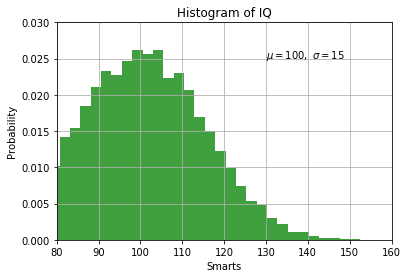

In [345]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15  # mean = 100, standard deviation=15
dataset = mu + sigma * np.random.randn(10000) # Return a sample (or samples) from the “standard normal” distribution.
print(dataset.size)

# the histogram of the data, to be investigated
n, bins, patches = plt.hist(dataset, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(130, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([80, 160, 0, 0.03])
plt.grid(True)
plt.show()

<p>Available Markers:</p>
<table border="1" class="docutils">
<colgroup>
<col width="38%" />
<col width="62%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">marker</th>
<th class="head">description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>&#8221;.&#8221;</td>
<td>point</td>
</tr>
<tr class="row-odd"><td>&#8221;,&#8221;</td>
<td>pixel</td>
</tr>
<tr class="row-even"><td>&#8220;o&#8221;</td>
<td>circle</td>
</tr>
<tr class="row-odd"><td>&#8220;v&#8221;</td>
<td>triangle_down</td>
</tr>
<tr class="row-even"><td>&#8220;^&#8221;</td>
<td>triangle_up</td>
</tr>
<tr class="row-odd"><td>&#8220;&lt;&#8221;</td>
<td>triangle_left</td>
</tr>
<tr class="row-even"><td>&#8220;&gt;&#8221;</td>
<td>triangle_right</td>
</tr>
<tr class="row-odd"><td>&#8220;1&#8221;</td>
<td>tri_down</td>
</tr>
<tr class="row-even"><td>&#8220;2&#8221;</td>
<td>tri_up</td>
</tr>
<tr class="row-odd"><td>&#8220;3&#8221;</td>
<td>tri_left</td>
</tr>
<tr class="row-even"><td>&#8220;4&#8221;</td>
<td>tri_right</td>
</tr>
<tr class="row-odd"><td>&#8220;8&#8221;</td>
<td>octagon</td>
</tr>
<tr class="row-even"><td>&#8220;s&#8221;</td>
<td>square</td>
</tr>
<tr class="row-odd"><td>&#8220;p&#8221;</td>
<td>pentagon</td>
</tr>
<tr class="row-even"><td>&#8220;*&#8221;</td>
<td>star</td>
</tr>
<tr class="row-odd"><td>&#8220;h&#8221;</td>
<td>hexagon1</td>
</tr>
<tr class="row-even"><td>&#8220;H&#8221;</td>
<td>hexagon2</td>
</tr>
<tr class="row-odd"><td>&#8220;+&#8221;</td>
<td>plus</td>
</tr>
<tr class="row-even"><td>&#8220;x&#8221;</td>
<td>x</td>
</tr>
<tr class="row-odd"><td>&#8220;D&#8221;</td>
<td>diamond</td>
</tr>
<tr class="row-even"><td>&#8220;d&#8221;</td>
<td>thin_diamond</td>
</tr>
<tr class="row-odd"><td>&#8220;|&#8221;</td>
<td>vline</td>
</tr>
<tr class="row-even"><td>&#8220;_&#8221;</td>
<td>hline</td>
</tr>
<tr class="row-odd"><td>TICKLEFT</td>
<td>tickleft</td>
</tr>
<tr class="row-even"><td>TICKRIGHT</td>
<td>tickright</td>
</tr>
<tr class="row-odd"><td>TICKUP</td>
<td>tickup</td>
</tr>
<tr class="row-even"><td>TICKDOWN</td>
<td>tickdown</td>
</tr>
<tr class="row-odd"><td>CARETLEFT</td>
<td>caretleft</td>
</tr>
<tr class="row-even"><td>CARETRIGHT</td>
<td>caretright</td>
</tr>
<tr class="row-odd"><td>CARETUP</td>
<td>caretup</td>
</tr>
<tr class="row-even"><td>CARETDOWN</td>
<td>caretdown</td>
</tr>
<tr class="row-odd"><td>&#8220;None&#8221;</td>
<td>nothing</td>
</tr>
<tr class="row-even"><td>None</td>
<td>nothing</td>
</tr>
<tr class="row-odd"><td>&#8221; &#8220;</td>
<td>nothing</td>
</tr>
<tr class="row-even"><td>&#8220;&#8221;</td>
<td>nothing</td>
</tr>
<tr class="row-odd"><td><code class="docutils literal"><span class="pre">'$...$'</span></code></td>
<td>render the string using mathtext.</td>
</tr>
<tr class="row-even"><td><code class="xref py py-obj docutils literal"><span class="pre">verts</span></code></td>
<td>a list of (x, y) pairs used for Path vertices.
The center of the marker is located at (0,0) and
the size is normalized.</td>
</tr>
<tr class="row-odd"><td>path</td>
<td>a <a class="reference internal" href="path_api.html#matplotlib.path.Path" title="matplotlib.path.Path"><code class="xref py py-obj docutils literal"><span class="pre">Path</span></code></a> instance.</td>
</tr>
<tr class="row-even"><td>(<code class="xref py py-obj docutils literal"><span class="pre">numsides</span></code>, <code class="xref py py-obj docutils literal"><span class="pre">style</span></code>, <code class="xref py py-obj docutils literal"><span class="pre">angle</span></code>)</td>
<td>see below</td>
</tr>
</tbody>
</table>

In [346]:
# import numpy as np
# import matplotlib.pyplot as plt
myFirstFigure = plt.figure("hello world numpy plot")

<Figure size 432x288 with 0 Axes>

In [0]:
subplot_1 = myFirstFigure.add_subplot(2, 3, 1) # 2 rows 3 columns, number1 subplot ()
subplot_6 = myFirstFigure.add_subplot(2, 3, 6) # number6 subplot (last one)


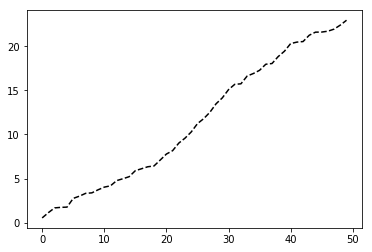

In [348]:
plt.plot(np.random.rand(50).cumsum(), 'k--') # 50 elements cumulative sum, k is black and -- is straigh lines
plt.show()

more examples can be found from a2b2c helloworld1.ipynb

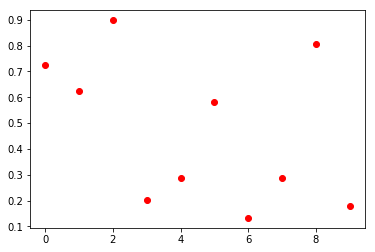

In [349]:
subplot_1 = myFirstFigure.add_subplot(2, 3, 2)
plt.plot(np.random.rand(10) , 'ro') # red, circle
plt.show()

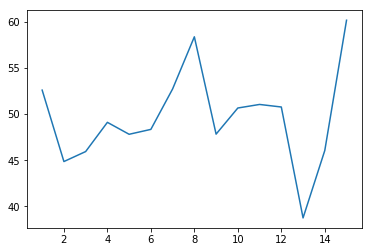

In [350]:
data_set_size = 15
low_mu, low_sigma = 50, 4.3
low_data_set = low_mu + low_sigma * np.random.randn(data_set_size) # generate 15 data points, normally distrubted with mean 50, standard deviation 4.3
high_mu, high_sigma = 57, 5.2
high_data_set = high_mu + high_sigma * np.random.randn(data_set_size) #generate 15 data points, normally distrubted with mean 57, standard deviation 5.2

days = list(range(1, data_set_size + 1)) # x axis

plt.plot(days, low_data_set) # default use lines
plt.show()

Multiple lines in a plot

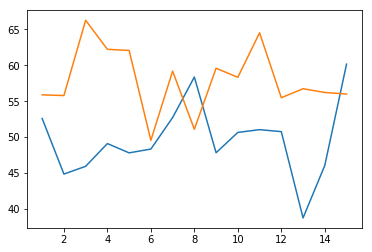

In [351]:
plt.plot(days, low_data_set,         
         days, high_data_set) # 2 data sets are drawn here
plt.show()

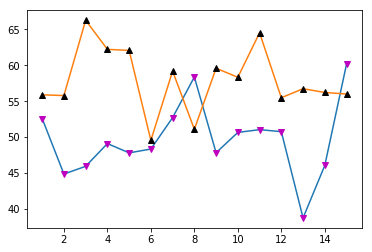

In [352]:
# marker table above, v is down arrow, ^ is upper arrow
plt.plot(days, low_data_set,
         days, low_data_set, "vm", # lower triangle, color is meganta
         days, high_data_set, 
         days, high_data_set, "^k") # upper triangle, color is black
plt.show() # 4 data sets are drawn here

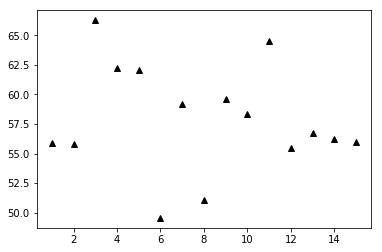

In [353]:
plt.plot(days, high_data_set, "^k")
plt.show() # 1 data set is drawn here

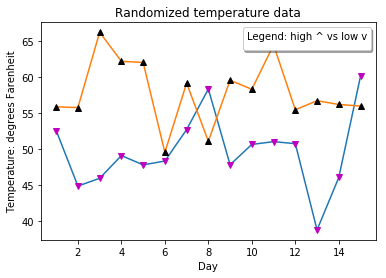

In [354]:
# Add the x,y labels and title, legend is more a text box here
plt.plot(days, low_data_set,
         days, low_data_set, "vm",
         days, high_data_set, 
         days, high_data_set, "^k")
plt.xlabel('Day')
plt.ylabel('Temperature: degrees Farenheit')
plt.title('Randomized temperature data')
plt.legend(loc="upper right", shadow=True, title="Legend: high ^ vs low v")
plt.show()

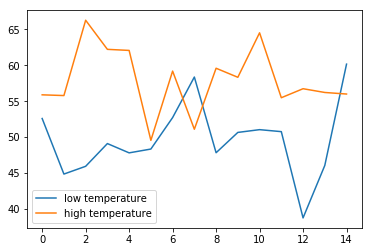

In [355]:
line1, = plt.plot(low_data_set)
line2, = plt.plot(high_data_set)
line1.set_label('low temperature')
line2.set_label('high temperature')
plt.legend()

Mark, Label and Grid

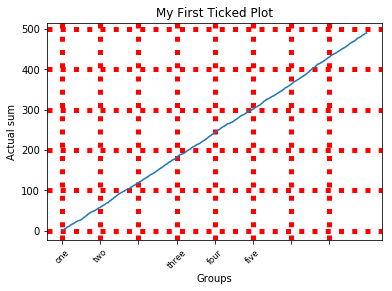

In [356]:
number_of_data_points = 1000

my_figure = plt.figure()
subplot_1 = my_figure.add_subplot(1, 1, 1) # only one subplot in this figure
subplot_1.plot(np.random.rand(number_of_data_points).cumsum()) # add data to subplot

number_of_ticks = 8
ticks = np.arange(0, number_of_data_points, number_of_data_points//number_of_ticks) # (0~1000, integer 0~125)
subplot_1.set_xticks(ticks) # this won't be displayed on the subplot, only scales it

labels = subplot_1.set_xticklabels(['one', 'two', '', 'three', 'four', 'five'], rotation=45, fontsize='small')

subplot_1.set_title ("My First Ticked Plot")
subplot_1.set_xlabel ("Groups")
subplot_1.set_ylabel ("Actual sum")


#subplot_1.grid(True)
#gridlines = subplot_1.get_xgridlines() + subplot_1.get_ygridlines()
#for line in gridlines:
#    line.set_linestyle(':')

# comment out grid example above and use a simpler one

subplot_1.grid(color='r', linestyle=':', linewidth=5)
plt.show()

Line styles for grid lines
<list>
    <li>-    solid line</li>
    <li>--   dashed line</li>
    <li>-.   dash dot line</li>
    <li>:    dotted</li>
</list>

More information about lines available at: http://matplotlib.org/api/lines_api.html

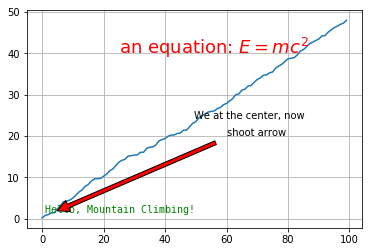

In [357]:
# add text box and arrow annotation
number_of_data_points = 100

my_figure2 = plt.figure()
subplot_1 = my_figure2.add_subplot(1, 1, 1) # only one subplot in this figure
subplot_1.plot(np.random.rand(number_of_data_points).cumsum()) # add data to subplot

subplot_1.grid(None) # somehow after it's set to none, the grid is still here
subplot_1.text (25, 40, r'an equation: $E=mc^2$', fontsize=18, color='red') # x=25, y=40 r'  accepts regex
subplot_1.text (1, 1.5, "Hello, Mountain Climbing!", family='monospace', fontsize=10, color='green')

# add text box at the center 0.5 here means 50%, more on transform http://matplotlib.org/users/transforms_tutorial.html
subplot_1.text(0.5, 0.5, b"We at the center, now", transform=subplot_1.transAxes)

# the allow start from xytext and points to xy
subplot_1.annotate('shoot arrow', xy=(2, 1), xytext=(60, 20),
            arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

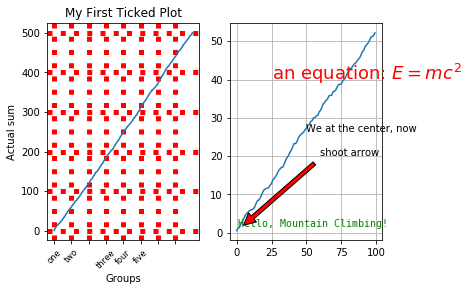

In [358]:
#Show above graphs side by side

number_of_data_points = 1000

my_figure = plt.figure()
subplot_1 = my_figure.add_subplot(1, 2, 1) # only one subplot in this figure
subplot_1.plot(np.random.rand(number_of_data_points).cumsum()) # add data to subplot

number_of_ticks = 8
ticks = np.arange(0, number_of_data_points, number_of_data_points//number_of_ticks) # (0~1000, integer 0~125)
subplot_1.set_xticks(ticks) # this won't be displayed on the subplot, only scales it

labels = subplot_1.set_xticklabels(['one', 'two', '', 'three', 'four', 'five'], rotation=45, fontsize='small')

subplot_1.set_title ("My First Ticked Plot")
subplot_1.set_xlabel ("Groups")
subplot_1.set_ylabel ("Actual sum")

subplot_1.grid(color='r', linestyle=':', linewidth=5)


# remove grid but add text box
number_of_data_points = 100

#my_figure2 = plt.figure()
subplot_2 = my_figure.add_subplot(1, 2, 2) # only one subplot in this figure
subplot_2.plot(np.random.rand(number_of_data_points).cumsum()) # add data to subplot

subplot_2.grid(None) # somehow after it's set to none, the grid is still here
subplot_2.text (25, 40, r'an equation: $E=mc^2$', fontsize=18, color='red') # x=25, y=40 r'  accepts regex
subplot_2.text (1, 1.5, "Hello, Mountain Climbing!", family='monospace', fontsize=10, color='green')

# add text box at the center 0.5 here means 50%, more on transform http://matplotlib.org/users/transforms_tutorial.html
subplot_2.text(0.5, 0.5, b"We at the center, now", transform=subplot_2.transAxes)

# the allow start from xytext and points to xy
subplot_2.annotate('shoot arrow', xy=(2, 1), xytext=(60, 20),
            arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

Subplots

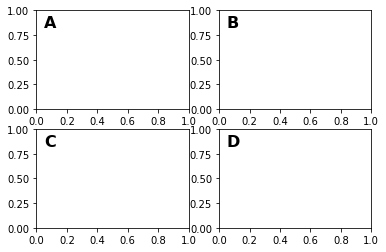

In [359]:
fig = plt.figure()
for i, label in enumerate(('A', 'B', 'C', 'D')):
    ax = fig.add_subplot(2,2,i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')

plt.show()

More legend example: http://matplotlib.org/examples/pylab_examples/legend_demo2.html

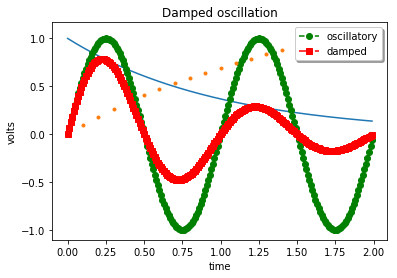

In [360]:
t1 = np.arange(0.0, 2.0, 0.1)
t2 = np.arange(0.0, 2.0, 0.01)

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = plt.plot(t2, np.exp(-t2))
l2, l3 = plt.plot(t2, np.sin(2 * np.pi * t2), '--go', t1, np.log(1 + t1), '.')
l4, = plt.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 'rs-.')

plt.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)
plt.xlabel('time')
plt.ylabel('volts')
plt.title('Damped oscillation')
plt.show()

Another annotation example

(221.40000000000003, 144.72)


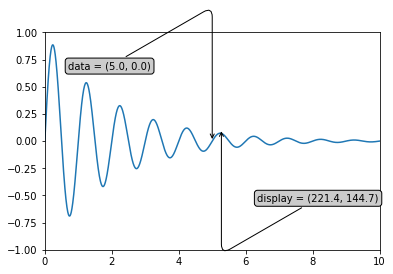

In [361]:
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0
xdisplay, ydisplay = ax.transData.transform_point((xdata, ydata))
print(xdisplay, ydisplay)

# bbox defines the 2 boxes. fc is grayscale betweem 0 - 1
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle,angleA=30,angleB=90,rad=10") #angel of the arrows

offset = 72
ax.annotate('data = (%.1f, %.1f)'%(xdata, ydata), # txt box 1 content
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points', # to 5,0, from 5+(-2)*offset, 0+offset
            bbox=bbox, arrowprops=arrowprops)  #bbox style, with arrowprops


disp = ax.annotate('display = (%.1f, %.1f)'%(xdisplay, ydisplay), # txt box 1 content
            (xdisplay, ydisplay), xytext=(0.5*offset, -offset), # to pixel location? 221.4 144.7, from 221.4+0.5*offset, 144.7-offset
            xycoords='figure pixels',
            textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)


plt.show()

### Pie and Bar function API
http://matplotlib.org/api/pyplot_api.html

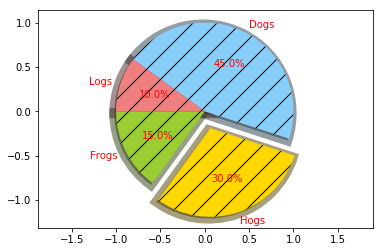

In [362]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10] # x=sizes, the percentage main body of the chart
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.2, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
wedgeproperty = {'linewidth': 10, 'hatch': '/'}

plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180, wedgeprops = wedgeproperty, 
        textprops=dict(color="r"), frame=True ) 
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')  # a circle, rather than ellipse

# matplotlib.pyplot.pie(x=[size], explode=None, labels=None, colors=None, autopct=None show percentage in 1.1f format etc, 
# pctdistance=0.6 percentage label to center disatance in radius ratio, 
# shadow=False, wedgeprops=None dict eg wedgeprops = {'linewidth': 10, 'hatch': '/'} https://matplotlib.org/api/_as_gen/matplotlib.patches.Wedge.html,
# labeldistance=1.1 text abel to center disatance in radius ratio, startangle=None, radius=None size of the pie, counterclock=True, 
# textprops=None dict text property, center=(0, 0), frame=False add x,y frame, data=None)


plt.show()

# returns 
# patches : list
#   sequence of matplotlib.patches.Wedge instances
# texts : list
#   is a list of the label matplotlib.text.Text instances.
# autotexts : list
#   is a list of Text instances for the numeric labels. Is returned only if parameter autopct is not None.

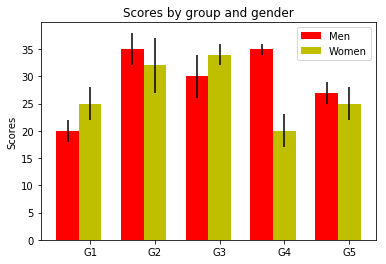

In [363]:
N = 5
menMeans = (20, 35, 30, 35, 27)
menStd = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

# matplotlib.pyplot.bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
fig, ax = plt.subplots()
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, womenMeans, width, color='y', yerr=womenStd)


# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')

ax.set_xticks(ind + width)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


plt.show()

For more complicated plots, [matplotlib's Gallery](https://matplotlib.org/gallery.html)
More example from my github in [Gallery.ipynb](https://raw.githubusercontent.com/cmskzhan/helloworld/master/LearnNumpy/Ch%204/04_07/Finish/Gallery.ipynb)

##  Algos, Linear algebra and statistics

###Universal Function

In [0]:
# simple function: truncated binomial: returns (x+1)**3 - (x)**3
def truncated_binomial(x):
    return (x+1)**3 - (x)**3

np.testing.assert_equal (truncated_binomial(4), 61) #unit test the function output against result

In [365]:
# frompyfunc() Takes an arbitrary Python function and returns a NumPy ufunc.
numpy_function = np.frompyfunc(truncated_binomial, 1, 1) # 1, 1 means input 1 output 1
numpy_function

<ufunc 'truncated_binomial (vectorized)'>

In [366]:
a = np.arange(10)
numpy_function(a)

array([1, 7, 19, 37, 61, 91, 127, 169, 217, 271], dtype=object)

In [367]:
a_outer=np.outer(a,a)
a_outer

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

In [368]:
numpy_function(a_outer)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 7, 19, 37, 61, 91, 127, 169, 217, 271],
       [1, 19, 61, 127, 217, 331, 469, 631, 817, 1027],
       [1, 37, 127, 271, 469, 721, 1027, 1387, 1801, 2269],
       [1, 61, 217, 469, 817, 1261, 1801, 2437, 3169, 3997],
       [1, 91, 331, 721, 1261, 1951, 2791, 3781, 4921, 6211],
       [1, 127, 469, 1027, 1801, 2791, 3997, 5419, 7057, 8911],
       [1, 169, 631, 1387, 2437, 3781, 5419, 7351, 9577, 12097],
       [1, 217, 817, 1801, 3169, 4921, 7057, 9577, 12481, 15769],
       [1, 271, 1027, 2269, 3997, 6211, 8911, 12097, 15769, 19927]],
      dtype=object)

In [0]:
# a simple np function to check if a number is integer
def is_integer(x):
    return np.equal(np.mod(x, 1), 0)

numpy_function2_is_integer = np.frompyfunc(is_integer, 1, 1) #convert above function to universal function

Find long side of right angel triangel with sides less than 11

\begin{equation*}
X^2 + Y^2 = Z^2
\end{equation*}

In [0]:
x = np.arange(9) + 1
y = np.arange(9) + 1

In [371]:
hypotenuse_squared = np.add.outer(x ** 2, y ** 2) 
hypotenuse= np.sqrt(hypotenuse_squared)
hypotenuse

array([[ 1.4142,  2.2361,  3.1623,  4.1231,  5.099 ,  6.0828,  7.0711,
         8.0623,  9.0554],
       [ 2.2361,  2.8284,  3.6056,  4.4721,  5.3852,  6.3246,  7.2801,
         8.2462,  9.2195],
       [ 3.1623,  3.6056,  4.2426,  5.    ,  5.831 ,  6.7082,  7.6158,
         8.544 ,  9.4868],
       [ 4.1231,  4.4721,  5.    ,  5.6569,  6.4031,  7.2111,  8.0623,
         8.9443,  9.8489],
       [ 5.099 ,  5.3852,  5.831 ,  6.4031,  7.0711,  7.8102,  8.6023,
         9.434 , 10.2956],
       [ 6.0828,  6.3246,  6.7082,  7.2111,  7.8102,  8.4853,  9.2195,
        10.    , 10.8167],
       [ 7.0711,  7.2801,  7.6158,  8.0623,  8.6023,  9.2195,  9.8995,
        10.6301, 11.4018],
       [ 8.0623,  8.2462,  8.544 ,  8.9443,  9.434 , 10.    , 10.6301,
        11.3137, 12.0416],
       [ 9.0554,  9.2195,  9.4868,  9.8489, 10.2956, 10.8167, 11.4018,
        12.0416, 12.7279]])

In [372]:
# mask them to find which ones are integer
# first get the mask
mask_non_int = numpy_function2_is_integer(hypotenuse)
mask_non_int.astype(bool) #has to convert from object type to boolean type, o/w err

array([[False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False,  True, False, False, False, False, False],
       [False, False,  True, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False,  True, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False,  True, False, False, False],
       [False, False, False, False, False, False, False, False, False]])

In [373]:
# apply mask to get the result of long side of a right triangel
filtered_nparray = hypotenuse[mask_non_int.astype(bool)]
filtered_nparray

array([ 5.,  5., 10., 10.])

For m and n positive integers, and m greater than n
\begin{equation*}
X = m^2 - n^2;  
Y = 2mn;  
Z = m^2 + n^2
\end{equation*}

### Linear Algebra

In [374]:
my_first_matrix = np.matrix([[3, 1, 4], [1, 5, 9], [2, 6, 5]])
my_first_matrix

matrix([[3, 1, 4],
        [1, 5, 9],
        [2, 6, 5]])

In [375]:
# transpose
print(my_first_matrix.T)
# inverse
print(my_first_matrix.I)

[[3 1 2]
 [1 5 6]
 [4 9 5]]
[[ 0.3222 -0.2111  0.1222]
 [-0.1444 -0.0778  0.2556]
 [ 0.0444  0.1778 -0.1556]]


In [376]:
# create an identity matrix
np.eye(5) # my_matrix = np.asmatrix(np.eye(5, dtype='int')) to define dtype

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

\begin{equation*}
AX = C
\end{equation*}
\begin{equation*}
X = A^{-1}C
\end{equation*}

In [0]:
c = np.matrix([[11],
               [22],
               [33]])

In [378]:
solution=my_first_matrix.I * c
solution

matrix([[ 2.9333],
        [ 5.1333],
        [-0.7333]])

\begin{equation*}
AX - C = [0]
\end{equation*}

In [379]:
# confirm that solution is correct
my_first_matrix * solution - c

matrix([[-3.5527e-15],
        [ 0.0000e+00],
        [ 7.1054e-15]])

In [380]:
# to solve large matrices efficiently
from numpy.linalg import solve
solve(my_first_matrix, c)

matrix([[ 2.9333],
        [ 5.1333],
        [-0.7333]])

In [381]:
# Compute the eigenvalues and right eigenvectors
from numpy.linalg import eig
eig(my_first_matrix)

(array([13.0858,  2.58  , -2.6658]), matrix([[-0.3154, -0.9512, -0.3237],
         [-0.7231,  0.3078, -0.7022],
         [-0.6146,  0.0229,  0.6341]]))

### Arithmatic sequence

In [382]:
my_teaser_array = np.array([1, 7, 19, 37, 61, 91, 127, 169, 217, 271, 331])
np.diff(my_teaser_array)

array([ 6, 12, 18, 24, 30, 36, 42, 48, 54, 60])

In [383]:
np.diff(my_teaser_array, n=2)

array([6, 6, 6, 6, 6, 6, 6, 6, 6])

In [384]:
np.diff(my_teaser_array, n=3)

array([0, 0, 0, 0, 0, 0, 0, 0])

### Statistics with Scipy

In [385]:
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

random_data_set = sp.randn(100) #normal distrubtion data set
type(random_data_set)

numpy.ndarray

#### descriptive statistics
##### mean

In [386]:
print(random_data_set.mean())
print(sp.mean(random_data_set))

0.027387840414101142
0.027387840414101142


##### median

In [387]:
#ndarray don't have median method/attribute
sp.median(random_data_set)


0.06853837168915111

##### minimum and maximum

In [388]:
# max, min only in nparray method, scipy has maximum in different meaning
min_max = np.array([random_data_set.min(), random_data_set.max()])
min_max

array([-2.8122,  2.5855])

##### standard deviation and variance

In [389]:
spread_measures = np.array([sp.std(random_data_set), sp.var(random_data_set)])
spread_measures

array([1.046 , 1.0941])

In [390]:
sp.stats.describe(random_data_set)

DescribeResult(nobs=100, minmax=(-2.812239738725175, 2.5855335368029464), mean=0.027387840414101142, variance=1.105162626304107, skewness=-0.2385627561271856, kurtosis=0.3375755079436056)

#### Probability Distributions
- continuous distributions
    - Normal: norm
    - Chi squared: chi2
    - Student's T: t
    - Uniform: uniform
- discrete distributions
    - Poisson: poisson
    - Binomial: binomial

##### Normal Distribution
documentation: http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.norm.html

In [391]:
# assume an area's people's IQ
iq_mean = 100
iq_std_dev = 15
iq_distribution = norm(loc=iq_mean, scale=iq_std_dev)
for n in np.arange(8):
    print('{:6.2f}'.format(iq_distribution.rvs())) # rvs is random variable function

109.02
 86.62
 99.25
111.22
117.18
 96.06
 98.95
110.92


probability density function (PDF)

For continuous variates, PDF is proportional to the probability of the variate being in a small interval about the input parameter

In [392]:
iq_pdf = iq_distribution.pdf(110)
print('{:6.2f}'.format(iq_pdf))

  0.02


cumulative density function (CDF)

For continuous variates, CDF gives the probability that the variate has a value less than or equal to the input parameter

In [393]:
iq_value = 120
iq_below = iq_distribution.cdf (iq_value)
iq_above = 1 - iq_below
print('Probability that IQ is below{:4d} is {:4.2f}; probability above: {:4.2f}'.format(iq_value, iq_below, iq_above))

Probability that IQ is below 120 is 0.91; probability above: 0.09


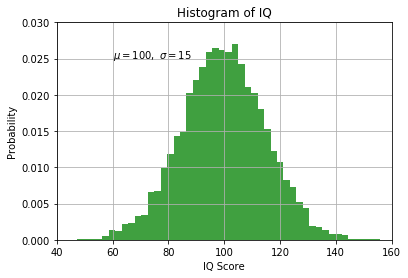

In [394]:
#draw me a picture
mu, sigma = 100, 15
data_set = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(data_set, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('IQ Score')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()